In [77]:
#필요한 라이브러리들 불러옴
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from nltk.tokenize import word_tokenize

In [78]:
Adata = pd.read_csv('데이터_최종.csv')
# 데이터의 NAN값 제거
Adata2 = Adata.dropna(axis=0)

#일부 크롤링한 데이터중 \nBook 같은 잘못된 데이터가 들어 있어 제거
Adata2['title']= Adata2['title'].str.rstrip('\nBook')


Adata2.head()

,title,theme
0,Mastering QuickBooks 2020,Business&Other
1,Hands-On Microsoft Teams,Business&Other
2,Microsoft 365 and SharePoint Online Cookb,Business&Other
3,Microsoft Power Platform Enterprise Architecture,Business&Other
4,Odoo 12 Development Cookbook - Third Edition,Business&Other


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X= Adata2['title'] 
y = Adata2['theme']


In [80]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

# 트위터나 페이스북 같은 SNS 텍스트를 분석할때 사용하는 토큰함수
from nltk.tokenize.casual import casual_tokenize

#SVD 알고리즘 적용 모델
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [81]:
# casual_tokenize 사용한 모델
#모델에 Tf-IDF 추가
#제목 데이터중 최소 5번 이상은 나온 토큰만 사용하고, 최대 2개로 이루어진 단어 토큰들을 사용
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=casual_tokenize,min_df=5, ngram_range=(1,2),stop_words="english")),
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [82]:
pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function casual_tokenize at 0x0000016C93680840>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         ver

In [55]:
#SVD 알고리즘 적용 모델 구축 과정


tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize,min_df=3,ngram_range=(1,2),stop_words="english")
tfidf_docs = tfidf_model.fit_transform(X).toarray()

LX_train, LX_test, Ly_train, Ly_test = train_test_split(tfidf_docs, y, random_state=50)

lda = LinearDiscriminantAnalysis()



In [56]:
model = lda.fit(LX_train, Ly_train)

C:\Users\Chicken is Right\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [83]:
#다중 라벨링으로 모델을 평가하기에 발표 과정중에는 test 세트로 정확도를 측정하지는 않음  
#최종 모델에는 train, test 구분없이 사용
#어떤 특성이 모델 예측도에 많은 영향을 끼쳤나 확인


vectorizer = pipeline["tfidf"]
train = vectorizer.transform(X_train)
max_value = train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()


feature_names = np.array(vectorizer.get_feature_names())
print("사용된 특성 수:", len(feature_names)) 
print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성: \n", feature_names[sorted_by_tfidf[-20:]])




사용된 특성 수: 7934
가장 낮은 tfidf를 가진 특성:
 ['bulldog |' 'pages |' 'story pages' 'write |' 'primary' 'space |'
 'draw write' 'journal kids' '100 story' '| dotted' 'exercise book'
 '| grades' 'dotted midline' '2 school' 'kids draw' 'grades k'
 'picture space' 'outer space' 'midline picture' '( outer']
가장 높은 tfidf를 가진 특성: 
 ['advanced' 'design' 'java' 'scanning' 'ii' 'microservices' 'software'
 'libreoffice' 'soa' 'android' 'freeswitch' 'cryptology' 'workshop' ':'
 'unity' 'mobile' 'beginning' 'working' 'technology' 'essential']


In [57]:
#SVD 모델


max_value = LX_train.max(axis=0).ravel()

sorted_by_tfidf = max_value.argsort()

feature_names = np.array(tfidf_model.get_feature_names())
print("사용된 특성 수:", len(feature_names)) 
print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성: \n", feature_names[sorted_by_tfidf[-20:]])

사용된 특성 수: 14511
가장 낮은 tfidf를 가진 특성:
 ['money ,' 'development raspberry' 'database upgrade' 'soul' '2019.1 ?'
 'collaboration ,' '12 :' 'christian' "hackers '" 'programming perl'
 'tensorflow lite' 'kibana 7' 'ultimate white' ': adventures' ', 10th'
 'network kali' 'xlminer' 'lightning-fast data' 'parallelize distribute'
 'docbook']
가장 높은 tfidf를 가진 특성: 
 ['algorithms' 'compiling' 'microcontroller' 'method' 'common'
 'associations' 'public' 'beginning' 'python' 'instant' 'java' 'fine'
 'sql' '3' 'using' 'freeswitch' 'mastering' 'virtualization' 'monitoring'
 'metadata']


In [84]:
#캐글 베스트셀러 데이터 로드

pro_book = pd.read_csv('prog_book.csv')
pro_book.head(5)

result = pd.DataFrame(columns=['title','label'])
result['title'] = pro_book['Book_title']
result.head()

,title,label
0,The Elements of Style,NaN
1,"The Information: A History, a Theory, a Flood",NaN
2,Responsive Web Design Overview For Beginners,NaN
3,Ghost in the Wires: My Adventures as the World...,NaN
4,How Google Works,NaN


In [85]:
#이번 발표에선 Kaggle데이터를 테스트 데이터로 사용하므로 기존에 크롤링한 데이터 전부를 훈련용 데이터를 사용해 모델 구축 

#model.fit(tfidf_docs,y)
predictions = pipeline.predict(pro_book['Book_title'])


In [86]:
proba = pipeline.predict_proba(predictions) #일반 모델 

#label_result에 사용할 컬럼
column = Adata2['theme'].unique()

df_prediction = pd.DataFrame(proba, columns=column)

#모델의 예측도 확인
df_prediction.head()


,Business&Other,Cloud&Networking,Data,Game Development,IoT&Hardware,Mobile,Programming,Security,WebDevelopment
0,0.389221,0.107236,0.242714,0.005677,0.080422,0.011945,0.092814,0.056926,0.013046
1,0.030565,0.049829,0.052244,0.002776,0.749548,0.004851,0.073955,0.031797,0.004434
2,0.057616,0.045134,0.135910,0.014499,0.108486,0.018751,0.589394,0.010105,0.020106
3,0.048487,0.334987,0.072929,0.003841,0.137998,0.015159,0.026247,0.340527,0.019825
4,0.110932,0.565544,0.105528,0.001157,0.140165,0.002576,0.032144,0.030044,0.011910


In [87]:
#베스트 셀러 데이터를 작업
#예측도가 높은 특성들은 다중 라벨링 되도록 코드 작성
count = len(column)
for i in range(0,len(df_prediction)):
    
    label = []
    pmax = max(df_prediction.loc[i]) 
    
    for j in range(0,count):
        if pmax * 0.8 < df_prediction.loc[i][j] :
            
            label.append(column[j])
            print(label)
        result['label'][i] = " | ".join(label)

['Business&Other']
['IoT&Hardware']
['Programming']
['Cloud&Networking']
['Cloud&Networking', 'Security']
['Cloud&Networking']
['Data']
['Cloud&Networking']
['IoT&Hardware']
['Data']
['Programming']
['Data']
['IoT&Hardware']
['Business&Other']
['Data']
['Programming']
['Cloud&Networking']
['Cloud&Networking', 'Security']
['IoT&Hardware']
['IoT&Hardware']
['Data']
['Cloud&Networking']
['Cloud&Networking', 'Security']
['IoT&Hardware']
['Data']
['Programming']
['IoT&Hardware']
['Game Development']
['IoT&Hardware']
['IoT&Hardware']
['IoT&Hardware']
['Programming']
['IoT&Hardware']
['Programming']
['Programming']
['IoT&Hardware']
['IoT&Hardware']
['IoT&Hardware']
['IoT&Hardware']
['IoT&Hardware']
['IoT&Hardware']
['Programming']
['IoT&Hardware']
['IoT&Hardware']
['Programming']
['Data']
['Business&Other']
['Programming']
['Business&Other']
['Programming']
['Business&Other']
['Programming']
['Data']
['Programming']
['Programming']
['IoT&Hardware']
['IoT&Hardware']
['Programming']
['Programmi

In [88]:
#라벨링 결과 파일로 보내기
result.to_csv(r'label_result.csv')

In [51]:
result['label'].value_counts()

Programming                    133
IoT&Hardware                    56
Data                            38
Game Development                18
Business&Other                  14
Cloud&Networking                 7
Cloud&Networking | Security      4
IoT&Hardware | Mobile            1
Name: label, dtype: int64

In [40]:
#다른 데이터로 모델간 특성 비교 했을때
"""
데이터의 작은 변화에 따라 예측이 크게 바뀜
IoT&Hardware으로 분류된 책들이 -> Cloud&Networking 으로 바뀜


"""
result['label'].value_counts()


WebDevelopment                    132
Cloud&Networking                   57
Data                               38
Mobile                             18
Business&Other                     14
Game Development                    7
Game Development | Security         4
Cloud&Networking | Programming      1
Name: label, dtype: int64

In [89]:
#언어 사전 데이터 불러오기
lan = pd.read_csv('language.csv')
lan.head()

,language
0,C
1,Java
2,Python
3,C++
4,JavaScript


In [90]:
result_lan = pd.DataFrame(columns=['language','label'])
result_lan['language'] = lan['language']


In [91]:
#만들어진 모델이 각 언어를 무슨 카테고리(기술)와 가장 연관성 있다고 분류하는지 확인 

predictions = pipeline.predict(lan['language'])

proba = pipeline.predict_proba(predictions) #일반 모델 

#label_result에 사용할 컬럼
column = Adata2['theme'].unique()

df_prediction = pd.DataFrame(proba, columns=column)

df_prediction.head()


,Business&Other,Cloud&Networking,Data,Game Development,IoT&Hardware,Mobile,Programming,Security,WebDevelopment
0,0.057616,0.045134,0.13591,0.014499,0.108486,0.018751,0.589394,0.010105,0.020106
1,0.057616,0.045134,0.13591,0.014499,0.108486,0.018751,0.589394,0.010105,0.020106
2,0.057616,0.045134,0.13591,0.014499,0.108486,0.018751,0.589394,0.010105,0.020106
3,0.057616,0.045134,0.13591,0.014499,0.108486,0.018751,0.589394,0.010105,0.020106
4,0.057616,0.045134,0.13591,0.014499,0.108486,0.018751,0.589394,0.010105,0.020106


In [92]:
# 예측값이 비슷하다면 다중 라벨링 작업, 테스트를 위해 조건은 max값의 0.5까지 낮췄음
count = len(column)
for i in range(0,len(df_prediction)):
    
    label = []
    pmax = max(df_prediction.loc[i]) 
    
    for j in range(0,count):
        if pmax * 0.5 < df_prediction.loc[i][j] :
            
            label.append(column[j])
            
        result_lan['label'][i] = " | ".join(label)

In [93]:
result_lan

,language,label
0,C,Programming
1,Java,Programming
2,Python,Programming
3,C++,Programming
4,JavaScript,Programming
5,PHP,Data
6,R,Data
7,SQL,Data
8,Go,Programming
9,Swift,Programming


In [43]:
#각언어가 어떤 테마랑 가장 관련 있는지 보여줌
"""
베스트셀러 분류때와 마찬가지로 데이터의 변화에 따라 예측값이 크게 달라짐

"""
result_lan

,language,label
0,C,WebDevelopment
1,Java,WebDevelopment
2,Python,WebDevelopment
3,C++,WebDevelopment
4,JavaScript,WebDevelopment
5,PHP,Data
6,R,Data
7,SQL,Data
8,Go,WebDevelopment
9,Swift,WebDevelopment


In [94]:
lan_count = []
for i in range (0,len(lan)):
    lan_count.append(0)
lan_count

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [95]:
#베스트 셀러 데이터중 가장 많이 언급된 언어를 찾음
def Language_num(df):
    for title in df:
        words = word_tokenize(title)

        for token in words:
            test = token.lower()
            
            for i in range(0,len(lan)):
               
                if test == lan['language'][i].lower():
                    lan_count[i] = lan_count[i] + 1
                    
Language_num(pro_book['Book_title'])                

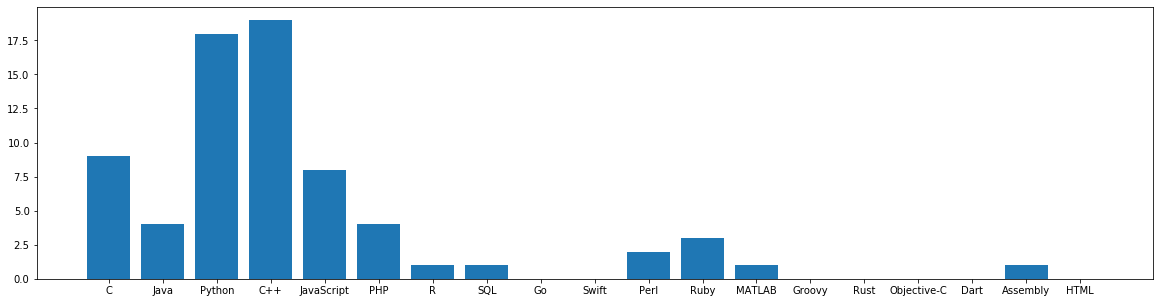

In [96]:
#베스트 셀러 데이터에서 언급된 언어 분포도

lan['count'] = lan_count
plt.figure(figsize=(20, 5))
plt.bar(lan['language'], lan['count'])

plt.show()

In [ ]:
"""
프로젝트가 처음 목표로 했던만큼 성과를 달성하지 못함 

딥러닝 수업을 통해, 딥러닝 모델 적용하고, 학습에 사용한 데이터의 분류 기준을 변경하여
모델을 개선해나갈려고함
"""